In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']},size=12)# 'Computer Modern'
rc('text', usetex=False)

In [18]:
g = open("D:/Paper_Climate/Data/clim3.txt", 'r')
#g = open("C:/Users/ASUS/Desktop/data-carpentry/dataclima.txt", 'r')
year = []
month = []
day = []
J1 = []
J2 = []
J3 = []
J4 = []
J5 = []
J6 = []
J7 = []
J8 = []
J9 = []
J10 = []
J11 = []
for line in g:
    s = line[:].split()
    year.append(float(s[0]))
    month.append(float(s[1]))
    day.append(float(s[2]))
    J1.append(float(s[3]))
    J2.append(float(s[4]))
    J3.append(float(s[5]))
    J4.append(float(s[6]))
    J5.append(float(s[7]))
    J6.append(float(s[8]))
    J7.append(float(s[9]))
    J8.append(float(s[10]))
    J9.append(float(s[11]))
    J10.append(float(s[12]))
    J11.append(float(s[13]))
    
    
data = pd.DataFrame({'año': year,
                     'mes': month, 
                     'dia': day, 
                     'CanESM2_WRF': J1, 
                     'CSIRO_Mk3': J2, 
                     'EC_EARTH_RCA4_v3': J3,
                     'IPSL_RCA4_v3': J4, 
                     'MIROC5_RCA4_v3': J5, 
                     'HadGEM2_RCA4_v3': J6,
                     'ESM2M_RCA4_v3': J7, 
                     'NorESM1_RCA4_v3': J8,
                     'MIROC5_Eta_v1': J9, 
                     'CanESM2_Eta_v1': J10, 
                     'Obs': J11})

In [19]:
# Comprobemos el resultado
data.head()

,año,mes,dia,CanESM2_WRF,CSIRO_Mk3,EC_EARTH_RCA4_v3,IPSL_RCA4_v3,MIROC5_RCA4_v3,HadGEM2_RCA4_v3,ESM2M_RCA4_v3,NorESM1_RCA4_v3,MIROC5_Eta_v1,CanESM2_Eta_v1,Obs
0,1981.0,1.0,1.0,3.36,1.40,1.56,0.64,1.94,0.00,8.13,2.46,5.72,4.84,0.178
1,1981.0,1.0,2.0,2.53,1.61,3.83,0.00,2.42,2.15,2.63,5.01,5.72,7.96,0.942
2,1981.0,1.0,3.0,3.24,3.92,1.96,1.80,1.21,5.23,2.84,6.79,5.72,2.77,2.105
3,1981.0,1.0,4.0,5.73,3.82,5.54,0.94,0.54,5.92,3.40,8.30,5.72,2.68,2.227
4,1981.0,1.0,5.0,5.06,3.53,8.22,0.00,2.31,6.17,3.45,3.86,0.00,4.89,4.946


In [20]:
# Vamos a crear un objeto de serie temporal a partir de fechas usando la función date_range
data.index = pd.date_range('1981-01-01', '2004-12-31', freq='D')
data
gswp3_daily_temp_df= data.drop(columns = ['año', 'mes', 'dia'])
gswp3_daily_temp_df

,CanESM2_WRF,CSIRO_Mk3,EC_EARTH_RCA4_v3,IPSL_RCA4_v3,MIROC5_RCA4_v3,HadGEM2_RCA4_v3,ESM2M_RCA4_v3,NorESM1_RCA4_v3,MIROC5_Eta_v1,CanESM2_Eta_v1,Obs
1981-01-01,3.36,1.40,1.56,0.64,1.94,0.00,8.13,2.46,5.72,4.84,0.178
1981-01-02,2.53,1.61,3.83,0.00,2.42,2.15,2.63,5.01,5.72,7.96,0.942
1981-01-03,3.24,3.92,1.96,1.80,1.21,5.23,2.84,6.79,5.72,2.77,2.105
1981-01-04,5.73,3.82,5.54,0.94,0.54,5.92,3.40,8.30,5.72,2.68,2.227
1981-01-05,5.06,3.53,8.22,0.00,2.31,6.17,3.45,3.86,0.00,4.89,4.946
...,...,...,...,...,...,...,...,...,...,...,...
2004-12-27,6.18,3.26,1.72,2.85,2.06,4.60,8.54,2.82,0.00,2.99,5.806
2004-12-28,11.05,3.56,1.56,3.13,3.31,3.31,5.12,2.15,0.00,0.07,3.165
2004-12-29,4.31,3.49,1.26,1.36,2.95,2.00,4.14,1.61,0.00,5.00,3.494
2004-12-30,4.33,1.68,2.00,0.00,2.37,3.50,2.51,1.20,0.00,4.98,4.096


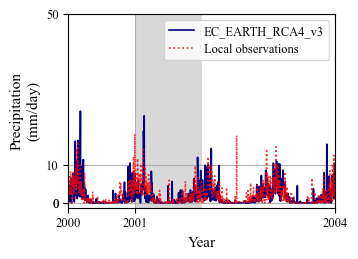

In [21]:
# Set general plotting optionscm = 1/2.54  # centimeters in inches
cm = 1/2.54  # centimeters in inches
DPI = 100
FIG_SIZE_CM = (9.5*cm, 7*cm)
TICK_LABEL_FONT_SIZE = 9
AX_LABEL_FONT_SIZE = 11
fig, ax = plt.subplots(dpi=DPI, figsize=FIG_SIZE_CM)

# GSWP3
ax.plot(gswp3_daily_temp_df.index, 
        gswp3_daily_temp_df.EC_EARTH_RCA4_v3,
        linewidth=1.2,
        color="#000080",
        label="EC_EARTH_RCA4_v3"
       )

# VCG
ax.plot(gswp3_daily_temp_df.index, 
        gswp3_daily_temp_df.Obs,
        linewidth=1.2,
        linestyle="dotted",
        alpha=0.8,
        color="red",
        label="Local observations"
       )

# Add simulation climate forcing period as shaded area
ax.axvspan(xmin=pd.Timestamp(2001, 1, 1),
           xmax=pd.Timestamp(2002, 1, 1),
           alpha=0.3, 
           facecolor="gray",
           edgecolor=None
          )

ax.set_ylabel("Precipitation\n(mm/day)", fontsize=AX_LABEL_FONT_SIZE)
ax.set_xlabel("Year", fontsize=AX_LABEL_FONT_SIZE)

#ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_xlim(pd.Timestamp(2000, 1, 1), pd.Timestamp(2004, 1, 1))
ax.set_xticks(
    [pd.Timestamp(2000, 1, 1),
     pd.Timestamp(2001, 1, 1),
     pd.Timestamp(2004, 1, 1)]
)

ax.tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONT_SIZE)

import matplotlib.dates as mdates
my_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(my_format)

ax.grid()
ax.legend(fontsize=TICK_LABEL_FONT_SIZE)

# Number of y-ticks
ax.set_yticks([0, 10, 0, 50])

# Save figure
fig.tight_layout()
#fig.savefig(fname=f"{plot_save_path}/gswp3_vcg_temperatures.png", format='png')

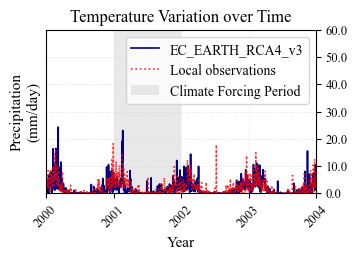

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

cm = 1/2.54  # centimeters in inches
DPI = 100
FIG_SIZE_CM = (9.5*cm, 7*cm)
TICK_LABEL_FONT_SIZE = 9
AX_LABEL_FONT_SIZE = 11

fig, ax = plt.subplots(dpi=DPI, figsize=FIG_SIZE_CM)

# GSWP3
ax.plot(gswp3_daily_temp_df.index, 
        gswp3_daily_temp_df.EC_EARTH_RCA4_v3,
        linewidth=1.2,
        color="#000080",
        label="EC_EARTH_RCA4_v3"
       )

# VCG
ax.plot(gswp3_daily_temp_df.index, 
        gswp3_daily_temp_df.Obs,
        linewidth=1.2,
        linestyle="dotted",
        alpha=0.8,
        color="red",
        label="Local observations"
       )

# Add simulation climate forcing period as shaded area
ax.axvspan(xmin=pd.Timestamp(2001, 1, 1),
           xmax=pd.Timestamp(2002, 1, 1),
           alpha=0.5, 
           facecolor="lightgray",
           edgecolor=None,
           label="Climate Forcing Period"
          )

ax.set_ylabel("Precipitation\n(mm/day)", fontsize=AX_LABEL_FONT_SIZE)
ax.set_xlabel("Year", fontsize=AX_LABEL_FONT_SIZE)
ax.set_title("Temperature Variation over Time", fontsize=12)

# Format x-axis date ticks
my_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(my_format)

# Set x-axis limits and ticks
ax.set_xlim(pd.Timestamp(2000, 1, 1), pd.Timestamp(2004, 1, 1))
ax.set_xticks(
    [pd.Timestamp(2000, 1, 1),
     pd.Timestamp(2001, 1, 1),
     pd.Timestamp(2002, 1, 1),
     pd.Timestamp(2003, 1, 1),
     pd.Timestamp(2004, 1, 1)]
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format y-axis with one decimal place
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

# Set y-axis limits and ticks
ax.set_ylim(0, 60)
ax.set_yticks([0, 10, 20, 30, 40, 50, 60])

# Move y-axis ticks to the right side for better alignment
ax.yaxis.tick_right()

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONT_SIZE)

# Customize the grid
ax.grid(color='lightgray', linestyle='dotted', linewidth=0.5)

# Show legend with increased font size
ax.legend(fontsize=TICK_LABEL_FONT_SIZE + 1)

# Adjust layout and save figure
fig.tight_layout()
plt.savefig("temperature_variation.png", dpi=DPI)
plt.show()


In [23]:
gswp3_month_temp_df = gswp3_daily_temp_df.resample(rule="M").sum() 
gswp3_month_temp_df

,CanESM2_WRF,CSIRO_Mk3,EC_EARTH_RCA4_v3,IPSL_RCA4_v3,MIROC5_RCA4_v3,HadGEM2_RCA4_v3,ESM2M_RCA4_v3,NorESM1_RCA4_v3,MIROC5_Eta_v1,CanESM2_Eta_v1,Obs
1981-01-31,156.90,115.40,114.71,86.22,87.29,51.87,143.19,103.23,102.96,120.05,88.730
1981-02-28,192.48,206.23,107.23,173.04,152.49,109.44,171.70,104.71,193.42,100.97,228.473
1981-03-31,113.80,74.32,111.69,90.36,126.67,42.92,120.13,68.34,129.66,145.45,49.087
1981-04-30,21.20,35.98,39.44,20.53,68.71,46.54,69.68,21.40,59.66,24.62,30.904
1981-05-31,9.36,18.18,17.17,4.88,17.33,5.13,7.78,5.53,3.22,11.32,1.635
...,...,...,...,...,...,...,...,...,...,...,...
2004-08-31,12.88,8.03,2.14,10.20,28.67,0.62,14.69,18.87,3.36,12.70,11.650
2004-09-30,13.54,14.23,30.57,12.81,18.55,11.19,4.31,9.14,12.94,22.33,26.484
2004-10-31,26.33,29.25,34.10,36.97,31.57,23.79,23.71,36.38,32.58,35.97,33.063
2004-11-30,57.94,58.26,41.95,30.19,33.77,46.32,60.18,53.33,85.65,54.78,65.441


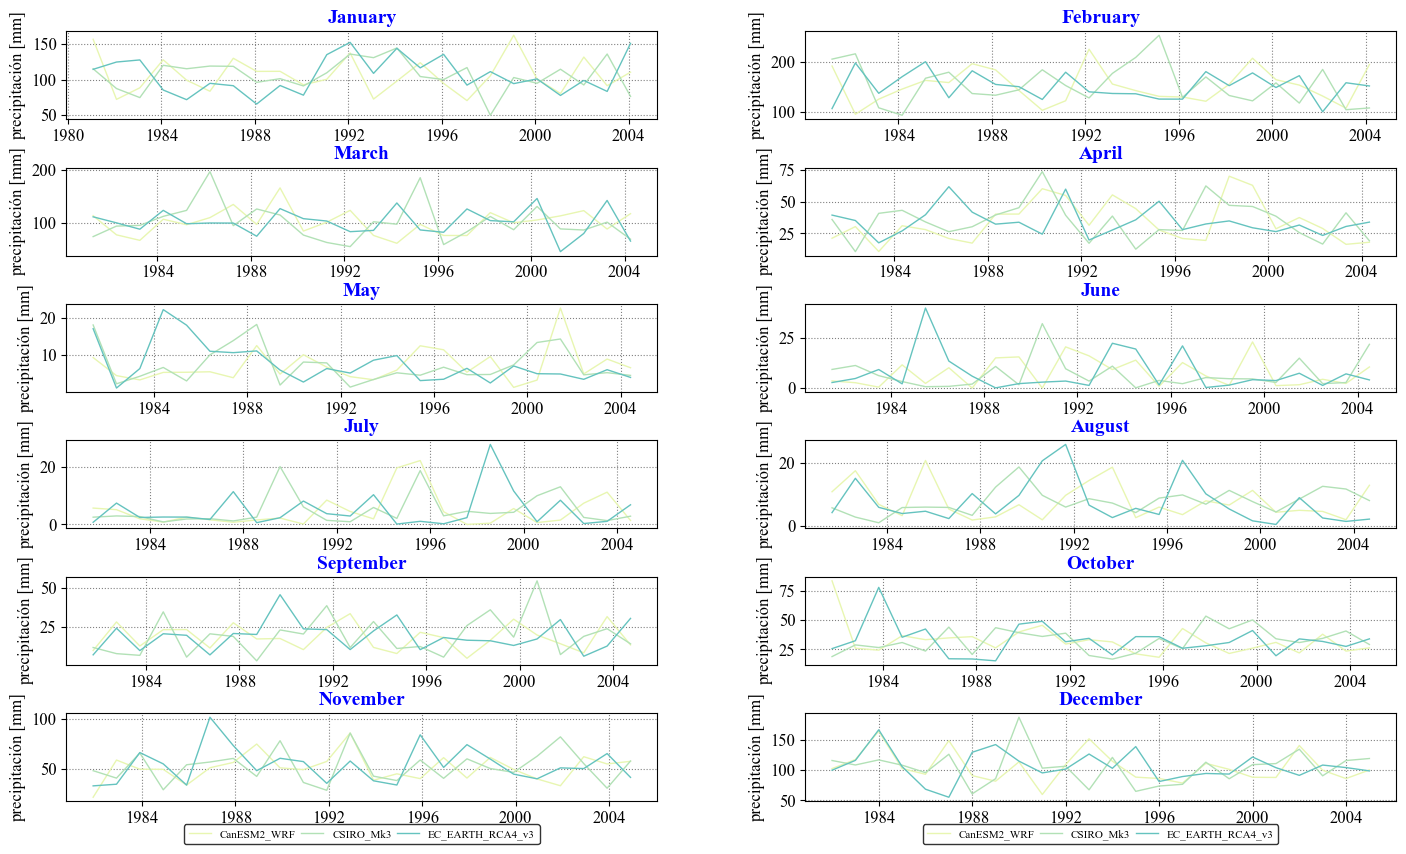

In [30]:
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_palette("YlGnBu")

# Asumiendo que tienes los datos cargados en 'gswp3_month_temp_df' DataFrame

# Función para obtener colores mensuales
def month_colors(i):
    colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11']
    return colors[i % len(colors)]

# Modelos disponibles
models = ['CanESM2_WRF', 'CSIRO_Mk3', 'EC_EARTH_RCA4_v3']

# Configuración de los subplots
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=[14, 10], facecolor='w')
plt.subplots_adjust(bottom=0.15, top=0.92, left=0.04, right=0.99, wspace=0.25, hspace=0.55)

# Gráficos para cada mes
for i in range(1, 13):
    row = (i - 1) // 2
    col = (i - 1) % 2
    ax = axs[row, col]
    
    # Filtrar datos para el mes específico
    df_month = gswp3_month_temp_df[gswp3_month_temp_df.index.month == i]
    dates_month = df_month.index
    
    # Configuración del grid
    ax.grid(which='major', linestyle=':', color=(0.5, 0.5, 0.5))  # Usar una tupla RGB en lugar de un número flotante
    month_name = calendar.month_name[i]
    ax.set_title(month_name, fontsize=14, fontweight='bold', color='b')
    ax.set(ylabel='precipitación [mm]')
    
    # Plot para cada modelo
    for model in models:
        precip_month = df_month[model]
        ax.plot(dates_month, precip_month, '-', lw=1, label=model)
    
    # Leyenda solo en la última fila
    if row == 5:
        ax.legend(loc='upper center', markerscale=0.7, frameon=True, edgecolor='k', columnspacing=0.5,
                  bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=8)
        for line in ax.get_legend().get_lines():
            line.set_linestyle('-')
    else:
        ax.legend().set_visible(False)  # Ocultar leyenda en las demás filas

plt.show()




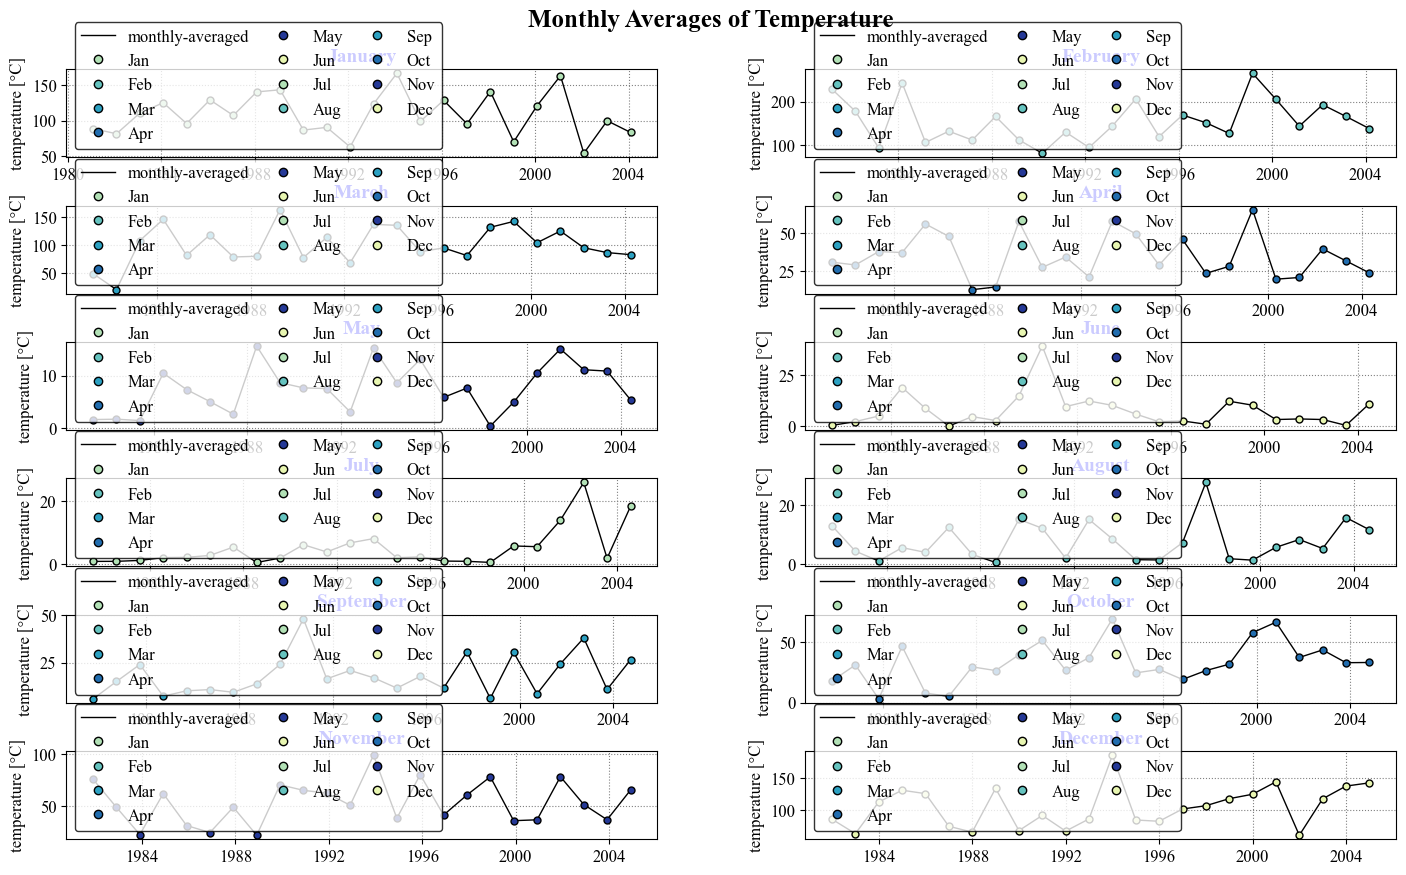

In [32]:
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_palette("YlGnBu")

# Función para obtener colores mensuales
def month_colors(i):
    colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11']
    return colors[i % len(colors)]

# Crear figura
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=[14, 10], facecolor='w')
plt.subplots_adjust(bottom=0.15, top=0.92, left=0.04, right=0.99, wspace=0.25, hspace=0.55)

# Gráficos para cada mes
for i in range(1, 13):
    row = (i - 1) // 2
    col = (i - 1) % 2
    ax = axs[row, col]
    
    # Filtrar datos para el mes específico
    df_month = gswp3_month_temp_df[gswp3_month_temp_df.index.month == i]
    dates_month = df_month.index
    chainage_month = df_month['Obs']
    
    # Configuración del grid
    ax.grid(which='major', linestyle=':', color='0.5')
    month_name = calendar.month_name[i]
    ax.set_title(month_name, fontsize=14, fontweight='bold', color='b')
    ax.set(ylabel='temperature [°C]')
    
    # Graficar el promedio mensual
    ax.plot(dates_month, chainage_month, '-', lw=1, color='k', mfc='w', ms=4, label='monthly-averaged')
    
    # Graficar los datos para cada mes
    for k in range(1, 13):
        month_data = df_month[df_month.index.month == k]
        ax.plot(month_data.index, month_data['Obs'], 'o', mec='k', color=month_colors(k), label=calendar.month_abbr[k], ms=5)
    
    # Colocar la leyenda
    ax.legend(loc='lower left', ncol=3, markerscale=1.2, frameon=True, edgecolor='k', columnspacing=1)

# Título principal
plt.suptitle('Monthly Averages of Temperature', fontsize=18, fontweight='bold', y=0.98)

# Mostrar la figura
plt.show()



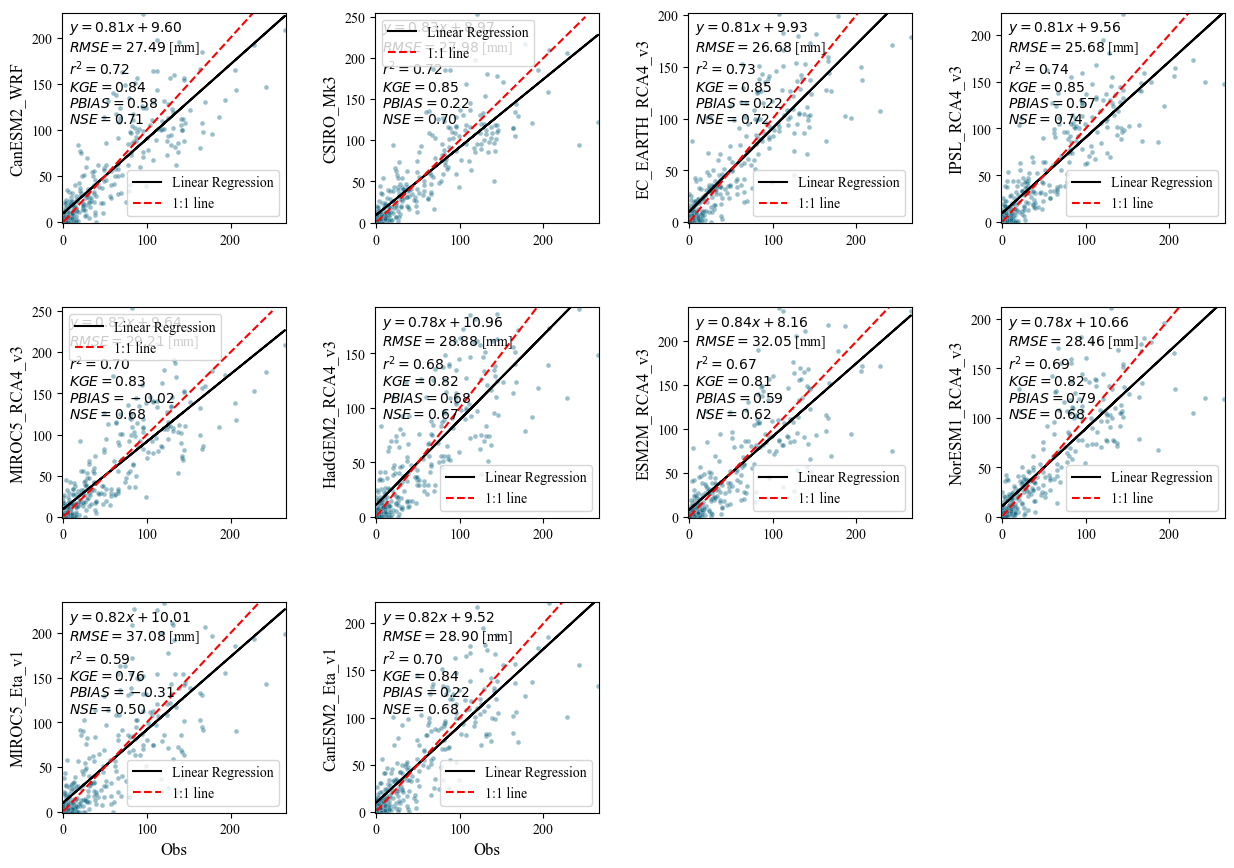

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.offsetbox import AnchoredText

DPI = 100
FIG_SIZE_CM = (15, 10)
AX_LABEL_FONT_SIZE = 12
TICK_LABEL_FONT_SIZE = 10
OFFSET = 1

def linear_regression_stats(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    rmse = np.sqrt(np.mean(np.square(y - (slope * x + intercept))))#rmse = np.sqrt(np.mean(np.square(y - (slope * x + intercept))))
    r_squared = r_value ** 2
    
    # Calculate KGE
    obs = x
    sim = y
    r = np.corrcoef(obs, sim)[0, 1]
    beta = sim.mean() / obs.mean()
    gamma = (sim.std() / sim.mean()) / (obs.std() / obs.mean())
    kge = 1 - np.sqrt((r - 1) ** 2 + (beta - 1) ** 2 + (gamma - 1) ** 2)
    
    # Calculate pbias
    pbias = np.sum(x - sim) / x.size
    
    # Calculate NSE
    numerator = np.sum((x - sim) ** 2)
    denominator = np.sum((x - np.mean(x)) ** 2)
    nse = 1 - numerator / denominator
    
    return slope, intercept, rmse, r_squared, kge, pbias, nse

def plot_linear_regression(ax, x, y, slope, intercept, r_squared, rmse, kge, pbias, nse):
    ax.scatter(x, y, s=12, edgecolors='white', color="#035e7b", linewidth=0.3, alpha=0.4)
    ax.plot(x, slope * x + intercept, color="black", label='Linear Regression')
    ax.plot([x + 1 for x in range(250)], [x + 1 for x in range(250)], color="red", linestyle="--", label="1:1 line")
    ax.set_xlabel("Obs", fontsize=AX_LABEL_FONT_SIZE)
    ax.set_ylabel("Air temperature (°C)", fontsize=AX_LABEL_FONT_SIZE)
    ax.set_xlim([min(x) - OFFSET, max(x) + OFFSET])
    ax.set_ylim([min(y) - OFFSET, max(y) + OFFSET])
    ax.tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONT_SIZE)
    ax.legend(fontsize=TICK_LABEL_FONT_SIZE)

    text_box = AnchoredText(f'$y = {slope:.2f}x {intercept:+.2f}$\n$RMSE = {rmse:.2f}$ [mm]\n$r^2 = {r_squared:.2f}$\n$KGE = {kge:.2f}$\n$PBIAS = {pbias:.2f}$\n$NSE = {nse:.2f}$',
                            frameon=False,
                            loc='upper left',
                            pad=0,
                            prop=dict(fontsize=TICK_LABEL_FONT_SIZE)
                           )
    plt.setp(text_box.patch, facecolor='none', alpha=0.5)
    ax.add_artist(text_box)

# Crea una figura y subplots con 3 filas y 4 columnas
fig, axes = plt.subplots(3, 4, dpi=DPI, figsize=FIG_SIZE_CM, gridspec_kw={'bottom': 0.1, 'top': 0.9, 'wspace': 0.4, 'hspace': 0.4})

# Datos de ejemplo
x = gswp3_month_temp_df['Obs']

for idx, col in enumerate(gswp3_month_temp_df.columns):
    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    y = gswp3_month_temp_df[col]
    
    # Calcula la regresión lineal y las estadísticas
    slope, intercept, rmse, r_squared, kge, pbias, nse = linear_regression_stats(x, y)

    # Graficar el scatter plot con regresión lineal y estadísticas
    plot_linear_regression(ax, x, y, slope, intercept, r_squared, rmse, kge, pbias, nse)
    
    # Agregar el nombre de la columna en el eje y
    ax.set_ylabel(col, fontsize=AX_LABEL_FONT_SIZE)
    
    # Eliminar el nombre del eje x en todas las figuras, excepto las dos últimas
    if row_idx != 2:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Obs', fontsize=AX_LABEL_FONT_SIZE)
        
# Ajustar el espaciado entre subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Eliminar los últimos 2 subplots
for ax in axes.flatten()[10:]:
    ax.remove()
    
# Agregar el nombre "Obs" en el eje x para las dos últimas figuras
axes[2, 2].set_xlabel("Obs", fontsize=AX_LABEL_FONT_SIZE)
axes[2, 3].set_xlabel("Obs", fontsize=AX_LABEL_FONT_SIZE)

# Guardar la figura
plt.show()

In [58]:
gswp3_month_temp_df = gswp3_month_temp_df.assign(month=gswp3_month_temp_df.index.month)
gswp3_month_temp_df = gswp3_month_temp_df.assign(year=gswp3_month_temp_df.index.year)
gswp3_month_temp_df 

,CanESM2_WRF,CSIRO_Mk3,EC_EARTH_RCA4_v3,IPSL_RCA4_v3,MIROC5_RCA4_v3,HadGEM2_RCA4_v3,ESM2M_RCA4_v3,NorESM1_RCA4_v3,MIROC5_Eta_v1,CanESM2_Eta_v1,Obs,month,year
1981-01-31,156.90,115.40,114.71,86.22,87.29,51.87,143.19,103.23,102.96,120.05,88.730,1,1981
1981-02-28,192.48,206.23,107.23,173.04,152.49,109.44,171.70,104.71,193.42,100.97,228.473,2,1981
1981-03-31,113.80,74.32,111.69,90.36,126.67,42.92,120.13,68.34,129.66,145.45,49.087,3,1981
1981-04-30,21.20,35.98,39.44,20.53,68.71,46.54,69.68,21.40,59.66,24.62,30.904,4,1981
1981-05-31,9.36,18.18,17.17,4.88,17.33,5.13,7.78,5.53,3.22,11.32,1.635,5,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-08-31,12.88,8.03,2.14,10.20,28.67,0.62,14.69,18.87,3.36,12.70,11.650,8,2004
2004-09-30,13.54,14.23,30.57,12.81,18.55,11.19,4.31,9.14,12.94,22.33,26.484,9,2004
2004-10-31,26.33,29.25,34.10,36.97,31.57,23.79,23.71,36.38,32.58,35.97,33.063,10,2004
2004-11-30,57.94,58.26,41.95,30.19,33.77,46.32,60.18,53.33,85.65,54.78,65.441,11,2004


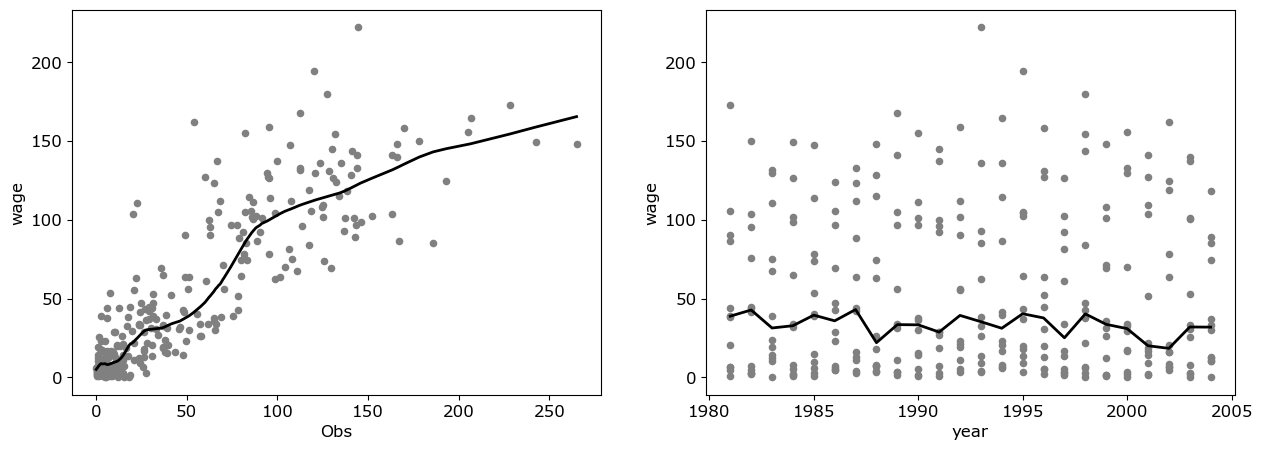

In [65]:
import statsmodels.api as sm
# plot relationship between wage and age, year and education: Figure 1.1
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# age vs wage
gswp3_month_temp_df.plot.scatter('Obs', 'IPSL_RCA4_v3', color="gray", ax=ax[0])
lowess = sm.nonparametric.lowess(gswp3_month_temp_df['IPSL_RCA4_v3'], gswp3_month_temp_df['Obs'], frac=.2)
ax[0].plot(lowess[:, 0], lowess[:, 1], color='black')

# year vs wage
gswp3_month_temp_df.plot.scatter('year', 'IPSL_RCA4_v3', color="gray", ax=ax[1])
ax[1].plot(gswp3_month_temp_df.groupby('year')['IPSL_RCA4_v3'].median(), color='black')

# set y-lebel in every subplot
for axes in ax.flat:
    axes.set(ylabel='wage')

# Seasonal Analysis

In [86]:
gswp3_month_temp_df.index = pd.to_datetime(gswp3_month_temp_df.index)
gswp3_month_temp_df.index

DatetimeIndex(['1981-01-31', '1981-02-28', '1981-03-31', '1981-04-30',
               '1981-05-31', '1981-06-30', '1981-07-31', '1981-08-31',
               '1981-09-30', '1981-10-31',
               ...
               '2004-03-31', '2004-04-30', '2004-05-31', '2004-06-30',
               '2004-07-31', '2004-08-31', '2004-09-30', '2004-10-31',
               '2004-11-30', '2004-12-31'],
              dtype='datetime64[ns]', length=288, freq='M')

In [89]:
gswp3_month_temp_df = gswp3_month_temp_df.assign(month=gswp3_month_temp_df.index.month)
gswp3_month_temp_df = gswp3_month_temp_df.assign(year=gswp3_month_temp_df.index.year)
gswp3_month_temp_df 

,CanESM2_WRF,CSIRO_Mk3,EC_EARTH_RCA4_v3,IPSL_RCA4_v3,MIROC5_RCA4_v3,HadGEM2_RCA4_v3,ESM2M_RCA4_v3,NorESM1_RCA4_v3,MIROC5_Eta_v1,CanESM2_Eta_v1,Obs,month,year
1981-01-31,156.90,115.40,114.71,86.22,87.29,51.87,143.19,103.23,102.96,120.05,88.730,1,1981
1981-02-28,192.48,206.23,107.23,173.04,152.49,109.44,171.70,104.71,193.42,100.97,228.473,2,1981
1981-03-31,113.80,74.32,111.69,90.36,126.67,42.92,120.13,68.34,129.66,145.45,49.087,3,1981
1981-04-30,21.20,35.98,39.44,20.53,68.71,46.54,69.68,21.40,59.66,24.62,30.904,4,1981
1981-05-31,9.36,18.18,17.17,4.88,17.33,5.13,7.78,5.53,3.22,11.32,1.635,5,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-08-31,12.88,8.03,2.14,10.20,28.67,0.62,14.69,18.87,3.36,12.70,11.650,8,2004
2004-09-30,13.54,14.23,30.57,12.81,18.55,11.19,4.31,9.14,12.94,22.33,26.484,9,2004
2004-10-31,26.33,29.25,34.10,36.97,31.57,23.79,23.71,36.38,32.58,35.97,33.063,10,2004
2004-11-30,57.94,58.26,41.95,30.19,33.77,46.32,60.18,53.33,85.65,54.78,65.441,11,2004


In [92]:
gswp3_month_temp_df = gswp3_month_temp_df.assign(time=gswp3_month_temp_df.index.values)
gswp3_month_temp_df.reset_index(drop=True, inplace=True)
gswp3_month_temp_df

,CanESM2_WRF,CSIRO_Mk3,EC_EARTH_RCA4_v3,IPSL_RCA4_v3,MIROC5_RCA4_v3,HadGEM2_RCA4_v3,ESM2M_RCA4_v3,NorESM1_RCA4_v3,MIROC5_Eta_v1,CanESM2_Eta_v1,Obs,month,year,time
0,156.90,115.40,114.71,86.22,87.29,51.87,143.19,103.23,102.96,120.05,88.730,1,1981,0
1,192.48,206.23,107.23,173.04,152.49,109.44,171.70,104.71,193.42,100.97,228.473,2,1981,1
2,113.80,74.32,111.69,90.36,126.67,42.92,120.13,68.34,129.66,145.45,49.087,3,1981,2
3,21.20,35.98,39.44,20.53,68.71,46.54,69.68,21.40,59.66,24.62,30.904,4,1981,3
4,9.36,18.18,17.17,4.88,17.33,5.13,7.78,5.53,3.22,11.32,1.635,5,1981,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,12.88,8.03,2.14,10.20,28.67,0.62,14.69,18.87,3.36,12.70,11.650,8,2004,283
284,13.54,14.23,30.57,12.81,18.55,11.19,4.31,9.14,12.94,22.33,26.484,9,2004,284
285,26.33,29.25,34.10,36.97,31.57,23.79,23.71,36.38,32.58,35.97,33.063,10,2004,285
286,57.94,58.26,41.95,30.19,33.77,46.32,60.18,53.33,85.65,54.78,65.441,11,2004,286


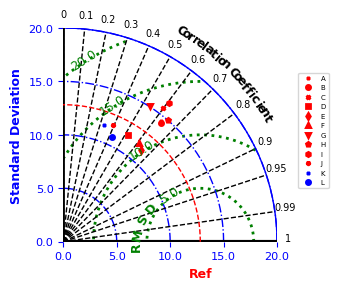

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skill_metrics as sm
from matplotlib import rcParams

# Data
r = [1, 0.628639686, 0.633058677, 0.59947913, 0.515011574, 0.646316167, 0.606872309, 0.539420422, 0.652494695, 0.605709943, 0.390130376, 0.331499019, 0.420672395]
sd = [12.82, 14.53837243, 14.38700013, 15.58594709, 11.7015734, 11.26121453, 11.60097358, 15.09805752, 15.04336632, 16.25893186, 11.82638154, 11.58799636, 10.8307417]
rsm = [0, 15.69, 14.91, 17.55, 11.65, 9.97, 10.51, 18.30, 16.97, 19.82, 13.24, 13.56, 11.97]

r2 = [1, 0.63, 0.63, 0.60, 0.52, 0.65, 0.61, 0.54, 0.65, 0.61, 0.39, 0.33, 0.42]
sd2 = [12.88, 14.30, 14.41, 15.95, 10.46, 9.39, 10.23, 14.53, 14.50, 15.90, 10.64, 10.12, 8.40]
rsm2 = [0, 15.69, 14.91, 17.55, 11.65, 9.97, 10.51, 18.30, 16.97, 19.82, 13.24, 13.56, 11.97]

# Figure settings
rcParams["figure.figsize"] = [4.5, 3.2]
rcParams['lines.linewidth'] = 1
rcParams.update({'font.size': 7})

# Data arrays
ccoef = np.array(r)
sdev = np.array(sd)
crmsd = np.array(rsm)

ccoef2 = np.array(r2)
sdev2 = np.array(sd2)
crmsd2 = np.array(rsm2)

# Labels for markers (you should define para)
label = (['Obs', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'])

# Taylor diagram
a1 = sm.taylor_diagram(sdev, crmsd, ccoef, markerLabel=label,
                      markerSize=3, markerLegend='on',
                      styleOBS='--', colOBS='red', markerobs='o', titleOBS='Ref',
                      colRMS='g', styleRMS=':', widthRMS=2.0, titleRMS='on',
                      colSTD='b', styleSTD='-.', widthSTD=1.0, titleSTD='on',
                      colCOR='k', styleCOR='--', widthCOR=1.0, titleCOR='on')

plt.show()


In [ ]:
##https://github.com/pinkychow1010/Downloading-CMIP-Data-using-Python/blob/main/cmip_pr_eda_public.ipynb